In [1]:
import matplotlib.pyplot as plt
from utils import data

In [2]:
%run cleaning.ipynb

C:\Users\clement\AppData\Local\Temp\ipykernel_14476\3656646732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Last Updated"] = data["Last Updated"].apply(lambda x: parse(x))
C:\Users\clement\AppData\Local\Temp\ipykernel_14476\2713534833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Installs'] = data['Installs'].str.replace('[+,]', '', regex=True).astype(int)
C:\Users\clement\AppData\Local\Temp\ipykernel_14476\90886282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [3]:
# Groupe les valeurs par note de sur le contenu
grouped_categories = data.groupby('Content Rating')['App'].count()
# Suppression des valeurs inférieures à 10
filtered_grouped_categories = grouped_categories[grouped_categories > 10]
top_cat = filtered_grouped_categories.sort_values(ascending=False)


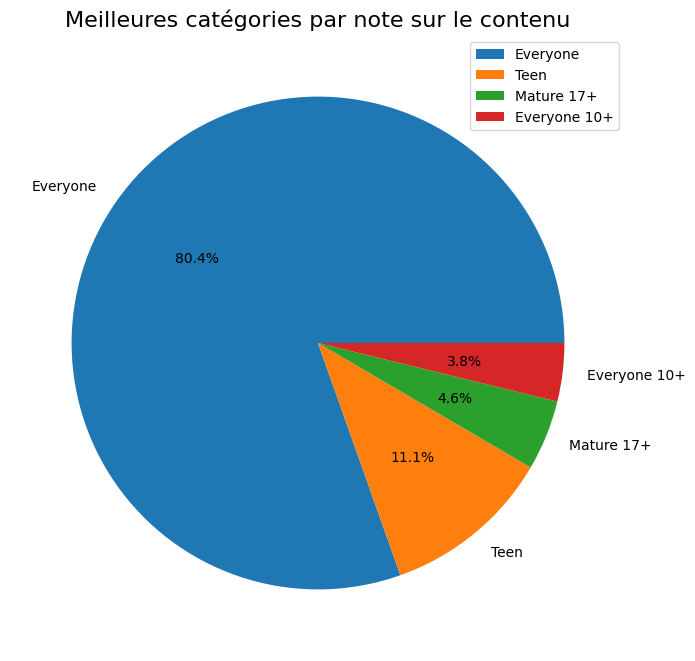

In [4]:
plt.figure(figsize=(8, 8))
plt.pie(top_cat, labels=top_cat.index, autopct='%1.1f%%')
plt.title("Meilleures catégories par note sur le contenu", fontsize=16)
plt.legend()
plt.show()

---

In [5]:
import numpy as np
import pandas as pd
from itertools import permutations, combinations, combinations_with_replacement, product
pd.set_option('display.max_columns', None)
from scipy.stats import binom, poisson
import plotly.express as px 
import plotly.graph_objects as go
import seaborn as sns

In [6]:
ratings_count = data['Rating'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=ratings_count.index,
    y=ratings_count
)])
fig.update_layout(
    title_text='Nombre d\'application par note',
    xaxis_title="Note", 
    yaxis_title="Nombre d'application a cette note", 
    width=900,
    xaxis=dict(tickmode = 'linear', dtick = 1),
    title_x=0.5
)
fig.show() 

---

In [7]:
# Groupe les valeurs par note de sur le contenu
reviews_and_unreviewed = data[['Reviews', 'Unreviewed']].sum()

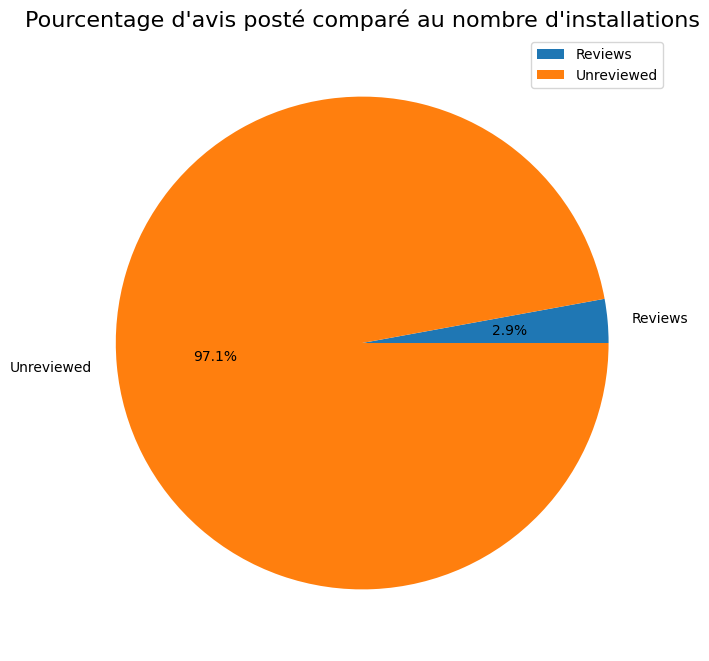

In [8]:
plt.figure(figsize=(8, 8))
plt.pie(reviews_and_unreviewed, labels=reviews_and_unreviewed.index, autopct='%1.1f%%')
plt.title("Pourcentage d'avis posté comparé au nombre d'installations", fontsize=16)
plt.legend()
plt.show()